In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("SP500Index_v2.csv",delimiter=",")

In [3]:
data.head(5)

,Name,Date,Open,High,Low,Close
0,SPX.GI,2019-12-09 09:35,3141.86,3143.41,3140.91,3143.41
1,SPX.GI,2019-12-09 09:40,3143.54,3146.64,3142.95,3146.39
2,SPX.GI,2019-12-09 09:45,3146.34,3148.04,3146.32,3147.96
3,SPX.GI,2019-12-09 09:50,3147.92,3148.38,3147.23,3147.34
4,SPX.GI,2019-12-09 09:55,3147.36,3148.15,3146.96,3147.80


In [4]:
mi = min(data['Date'])
ma = max(data['Date'])

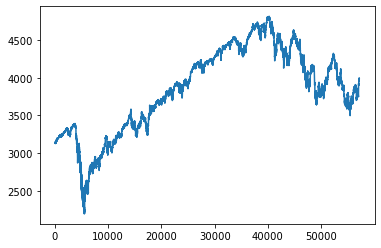

In [5]:

plt.plot(data["Close"])



In [6]:
rate=(np.log(data["Open"])/np.log(data["Close"])/5)*100

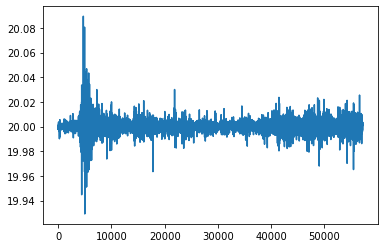

In [7]:
plt.plot(rate)

In [10]:
data["log_return"] = np.nan
for i in range(1,len(data["Date"])):
    data.loc[i,"log_return_sqr"] = ((np.log(data.loc[i,"Close"])-np.log(data.loc[i-1,"Close"]))*100)**2
    
    
for i in range(1,len(data["Date"])):
    data.loc[i,"log_return"] = (np.log(data.loc[i,"Close"])-np.log(data.loc[i-1,"Close"]))*100

In [11]:
data.tail()

,Name,Date,Open,High,Low,Close,log_return,log_return_sqr
57138,SPX.GI,2022-11-11 15:40,3988.72,3995.15,3988.08,3994.93,0.155067,0.024046
57139,SPX.GI,2022-11-11 15:45,3994.89,3997.88,3994.41,3997.82,0.072316,0.005230
57140,SPX.GI,2022-11-11 15:50,3997.87,4001.28,3996.24,3999.07,0.031262,0.000977
57141,SPX.GI,2022-11-11 15:55,3999.06,4000.29,3993.02,3994.29,-0.119599,0.014304
57142,SPX.GI,2022-11-11 17:06,3994.37,3994.39,3990.16,3992.93,-0.034054,0.001160


In [12]:

data['Day'] = data["Date"].str.split(' ').str[0] # creat a new column by only use the date

In [16]:
data.head()

,Name,Date,Open,High,Low,Close,log_return,log_return_sqr,Day
0,SPX.GI,2019-12-09 09:35,3141.86,3143.41,3140.91,3143.41,NaN,NaN,2019-12-09
1,SPX.GI,2019-12-09 09:40,3143.54,3146.64,3142.95,3146.39,0.094757,0.008979,2019-12-09
2,SPX.GI,2019-12-09 09:45,3146.34,3148.04,3146.32,3147.96,0.049886,0.002489,2019-12-09
3,SPX.GI,2019-12-09 09:50,3147.92,3148.38,3147.23,3147.34,-0.019697,0.000388,2019-12-09
4,SPX.GI,2019-12-09 09:55,3147.36,3148.15,3146.96,3147.80,0.014614,0.000214,2019-12-09


In [17]:
datas=data[["Day","log_return_sqr"]] # selecting the "Day" and "log_return_sqr" column

In [18]:
# DAY
dayd=datas.groupby(["Day"]).sum() # using groupby to calculate the sum of log_return_sqr by "Day"

In [19]:
dayd.head(11)

,log_return_sqr
Day,
2019-12-09,0.045404
2019-12-10,0.176594
2019-12-11,0.088090
2019-12-12,0.630203
2019-12-13,0.374203
2019-12-16,0.583274
2019-12-17,0.077952
2019-12-18,0.085122
2019-12-19,0.064809


In [20]:
dayd2=dayd.reset_index() # the return of group by will index a column automatically, I reset the index column as normal column here
dayd2.tail(10)
dayd2["week_log_return_sqr"]=0.0 # set the initial value as a float

In [21]:
# Week (1-5)

#monthd=datams.groupby(["Year","Month"]).mean()

# calculating by the week by the equation from the paper
for i in range(0,len(dayd2["log_return_sqr"])-4):
    dayd2["week_log_return_sqr"][i]=dayd2.loc[i:i+4,"log_return_sqr"].sum()/5
    


<ipython-input-21-ccf947c8c57b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dayd2["week_log_return_sqr"][i]=dayd2.loc[i:i+4,"log_return_sqr"].sum()/5


In [22]:
dayd2.tail(10)

,Day,log_return_sqr,week_log_return_sqr
726,2022-10-31,1.233758,2.543160
727,2022-11-01,1.676301,2.432877
728,2022-11-02,3.740318,2.362827
729,2022-11-03,2.187714,1.888834
730,2022-11-04,3.877709,4.082096
731,2022-11-07,0.682344,3.509699
732,2022-11-08,1.326048,0.000000
733,2022-11-09,1.370356,0.000000
734,2022-11-10,13.154022,0.000000
735,2022-11-11,1.015725,0.000000


In [26]:
# Month
# calculating by the month by the equation from the paper
dayd2["month_log_return_sqr"]=0
for i in range(0,len(dayd2["log_return_sqr"])-20):
    dayd2["month_log_return_sqr"][i]=dayd2.loc[i:i+20,"log_return_sqr"].sum()/21

<ipython-input-26-f0cb71c0416c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dayd2["month_log_return_sqr"][i]=dayd2.loc[i:i+20,"log_return_sqr"].sum()/21


In [27]:
dayd2.tail(22)

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr
714,2022-10-13,10.838424,5.756028,3.249539
715,2022-10-14,3.489850,3.824284,2.781791
716,2022-10-17,6.514763,3.579201,0.000000
717,2022-10-18,6.600078,2.711499,0.000000
718,2022-10-19,1.337025,1.526991,0.000000
719,2022-10-20,1.179706,1.469526,0.000000
720,2022-10-21,2.264433,1.594828,0.000000
721,2022-10-24,2.176255,1.353494,0.000000
722,2022-10-25,0.677535,1.164995,0.000000
723,2022-10-26,1.049702,1.364748,0.000000


In [29]:
# Final: droping the last 20 rows, since we can only provide a realible average with 21 avalible values
# 
m1=dayd2["month_log_return_sqr"]!=0
RV=dayd2[m1]
RV.tail(10)

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr
706,2022-10-03,1.833961,2.378276,2.702210
707,2022-10-04,4.461842,2.309695,2.694703
708,2022-10-05,1.645061,1.895762,2.660345
709,2022-10-06,1.376505,1.716010,2.686185
710,2022-10-07,2.574010,3.608394,2.805290
711,2022-10-10,1.491055,3.791561,2.715211
712,2022-10-11,2.392181,4.796303,2.707353
713,2022-10-12,0.746298,5.637882,2.658695
714,2022-10-13,10.838424,5.756028,3.249539
715,2022-10-14,3.489850,3.824284,2.781791
